In [2]:
#importing Libraries

import pandas as pd
import numpy as np
import keras
import matplotlib

In [3]:
#reading datasets

train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#splitting the dataset columns into independent and target. Target: label, Independent columns: pixels

x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

x_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [6]:
#Performing Data Normalization

x_train = np.array(x_train, dtype = 'float32')
x_test = np.array(x_test, dtype = 'float32')

x_train = x_train/255
x_test = x_test/255

In [7]:
#splitting the training dataset into train and validation data

from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 2)

In [8]:
print("Training data:", x_train.shape)
print("Validation data",x_validate.shape)
print("Testing data",x_test.shape)

Training data: (48000, 784)
Validation data (12000, 784)
Testing data (10000, 784)


In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

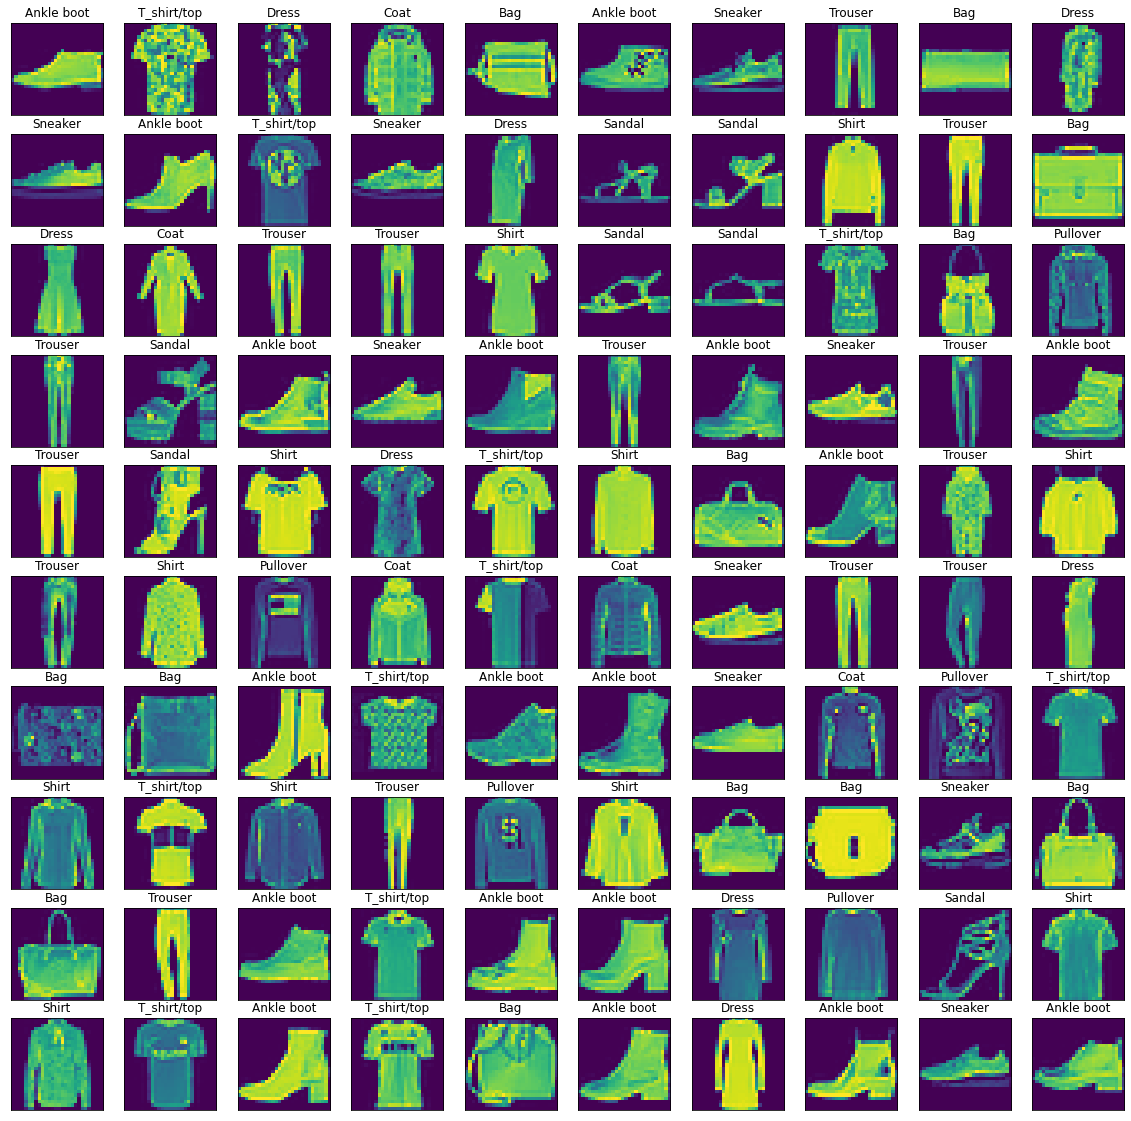

In [10]:
#Plotting training data
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(class_names[int(list(y_train)[i])])

In [11]:
#Reshaping data for model building
image_shape = (28,28,1) 

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

**Model Biuilding**

In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten


In [13]:
model = Sequential()
def model_arch():
    #Convolution layer 1 with input layer
    model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), input_shape= (28,28,1), activation='relu'))
    #Pooling layer 2
    model.add(AveragePooling2D(pool_size=(2,2), strides=(1,1)))
    #Convolution layer 3
    model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation="relu"))
    #fully-connected layer
    model.add(Flatten())
    model.add(Dense(84, activation="relu"))
    #Output layer with Softmax function
    model.add(Dense(10, activation='softmax'))
    return model

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model = model_arch()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 23, 23, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 16)        2416      
                                                                 
 flatten (Flatten)           (None, 5776)              0         
                                                                 
 dense (Dense)               (None, 84)                485268    
                                                                 
 dense_1 (Dense)             (None, 10)                850       
                                                        

In [16]:
model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_validate,y_validate))

Epoch 1/10
480/480 [==============================] - 29s 58ms/step - loss: 0.5268 - accuracy: 0.8086 - val_loss: 0.3919 - val_accuracy: 0.8597
Epoch 2/10
480/480 [==============================] - 27s 57ms/step - loss: 0.3619 - accuracy: 0.8693 - val_loss: 0.3577 - val_accuracy: 0.8717
Epoch 3/10
480/480 [==============================] - 30s 62ms/step - loss: 0.3117 - accuracy: 0.8862 - val_loss: 0.3107 - val_accuracy: 0.8896
Epoch 4/10
480/480 [==============================] - 28s 59ms/step - loss: 0.2782 - accuracy: 0.8987 - val_loss: 0.2917 - val_accuracy: 0.8980
Epoch 5/10
480/480 [==============================] - 27s 56ms/step - loss: 0.2539 - accuracy: 0.9068 - val_loss: 0.2827 - val_accuracy: 0.8973
Epoch 6/10
480/480 [==============================] - 29s 60ms/step - loss: 0.2346 - accuracy: 0.9119 - val_loss: 0.2833 - val_accuracy: 0.8988
Epoch 7/10
480/480 [==============================] - 29s 61ms/step - loss: 0.2160 - accuracy: 0.9183 - val_loss: 0.2712 - val_accuracy:

In [17]:
model.save("Fashion_MNIST")

INFO:tensorflow:Assets written to: Fashion_MNIST\assets


INFO:tensorflow:Assets written to: Fashion_MNIST\assets


In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.2596282362937927, 0.9114000201225281]

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2596282362937927
Test accuracy: 0.9114000201225281


In [20]:
predictions = []
outputs = model.predict(x_test)

for i in range(len(x_test)):
    predictions.append(np.argmax(outputs[i]))

313/313 [==============================] - 3s 9ms/step


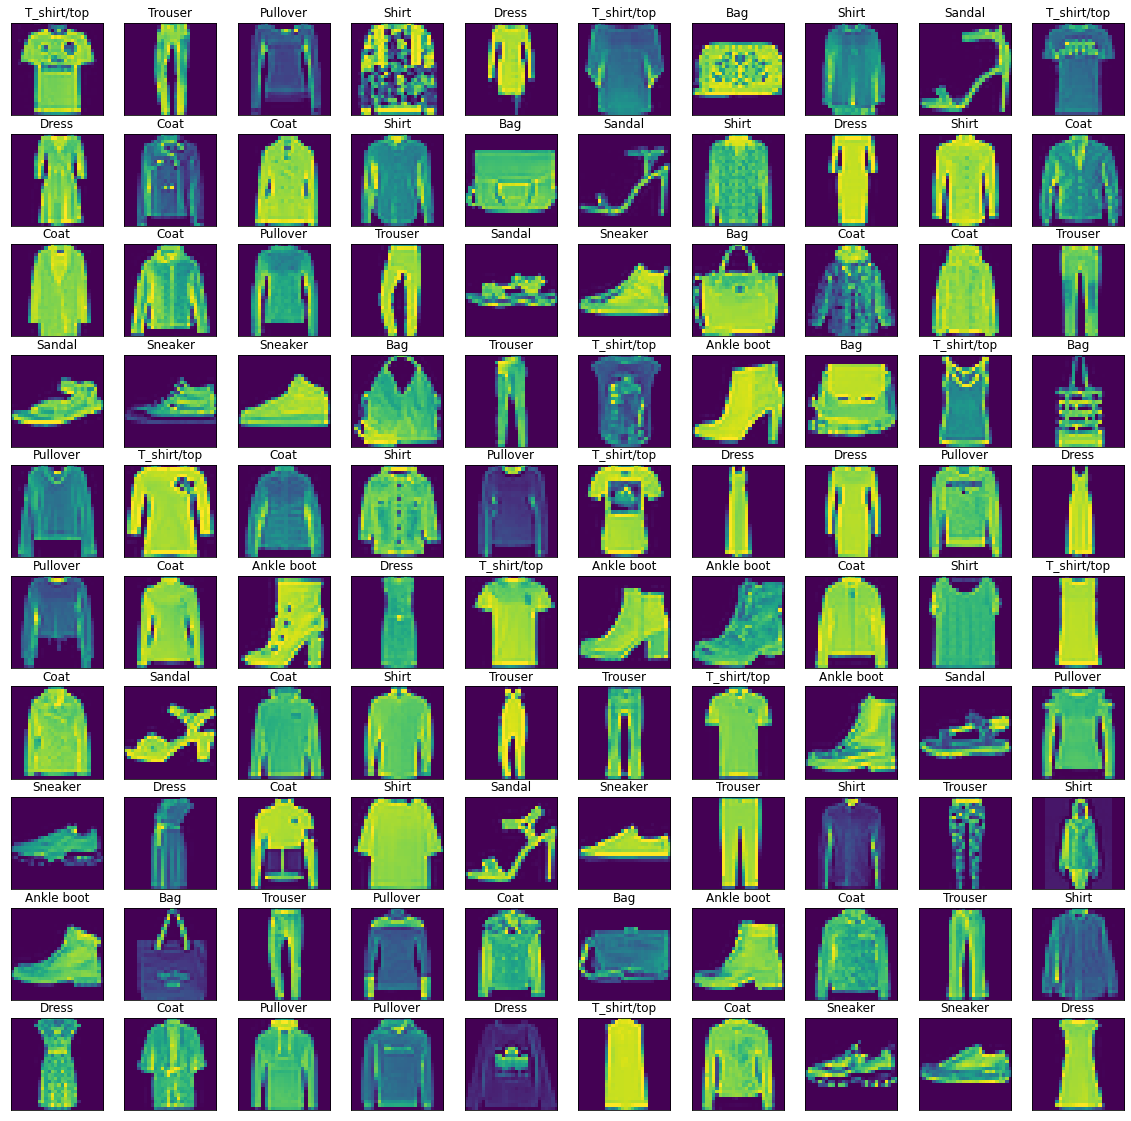

In [21]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.title(class_names[predictions[i]])

In [22]:
actual = list(y_test)
Outputs = pd.DataFrame(zip(actual, predictions), columns=['Actual', 'Predicted'])
Outputs.to_csv("Outputs")

In [23]:
Outputs.head()

,Actual,Predicted
0,0,0
1,1,1
2,2,2
3,2,6
4,3,3


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.84      0.86      1000
           3       0.93      0.92      0.92      1000
           4       0.87      0.86      0.86      1000
           5       0.98      0.97      0.97      1000
           6       0.76      0.73      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

